<a href="https://colab.research.google.com/github/marcusRB/uoc-ub-bioinformatics-programming-language/blob/master/03_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación para la Bioinformática

Unidad 3: Librerías científicas en Python - Matplotlib - Ejercicios
------------------------------------------------------

## Etiquetas

Bienvenidos a la PEC de la unidad 3. Bajo estas lineas encontrareis ejercicios y preguntas cada uno de ellos tendrá una etiqueta que indica los recursos necesarios para resolverlos. Hay tres posibles etiquetas:



* **<font color="green" size="+2">MU</font>** **Materiales unidad**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* **<font color="blue" size="+2">EG</font>** **Consulta externa guiada**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de como encontrar la información adicional necesaria.

* **<font color="gold" size="+2">CI</font>** **Consulta externa independiente**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, y el enunciado no incluye las indicaciones de como encontrar la información adicional. El estudiante deberá buscar esta información independientemente.

## Tests

Antes de nada, decir que en el ámbito de la programación es muy común utilizar tests (llamados tests unitarios) durante la codificación de los programas. Los tests sirven para saber si un programa se comporta como se espera. Es decir, sirven para validar la funcionalidad del programa, no para determinar la calidad del código.

Así pues, los tests son un gran aliado del programador. Es por eso que la mayoría de los ejercicios e incluso alguna de las preguntas tendran una celda bajo ellas con un comentario en la primera línea con el título: `# Test Ejercicio X` o `Test Pregunta X`

**IMPORTANTE**: **no debéis modificar las celdas de test**.

Si las ejecutáis, lo que CoLab hará será ejecutar el test correspondiente sobre vuestro código. Dependiendo del resultado, sabréis que:

* Si el test falla, entonces vuestro código no funciona como se espera. Así pues, tendréis que corregirlo.

* Si el test no falla, entonces vuestro código se comporta como se espera. Sin embargo, esto no significa que el el ejercicio sea correcto, ya que hay situaciones en las que se pide usar una determinada función o estructura. Por ejemplo, imaginad que se pide resolver un ejercicio usando un ``for`` y, en su lugar, usáis un ``while``. Pues seguramente vuestro programa pasaría el test (porque funciona como se espera), pero no respeta un requisito del enunciado.

**Para poder ejecutar los tests primero debéis ejecutar la siguiente celda de código**: (Tan solo una vez por sesión)

In [1]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00


###**Ejercicios de entrenamiento**

In [ ]:
plt.rcdefaults()
plt.style.use('default')

### **Ejercicio 1**


Haced un gráfico en el que se vea la progresión del rmsd a lo largo del tiempo, de los pasos de una dinámica molecular. Los valores de RMSD y los pasos de tiempo se encuentran en el fichero msd_uoc.dat. La primera columna corresponde a los pasos de tiempo, la segunda al backbone de la proteina, la tercera al substrato y la cuarta al centro activo.

El gráfico tiene que tener definido:

* Titulo en el eje x e y (con un tamaño de la letra de 14)
* Leyenda
* Cambiáis los colores predeterminados para cada columna dibujada

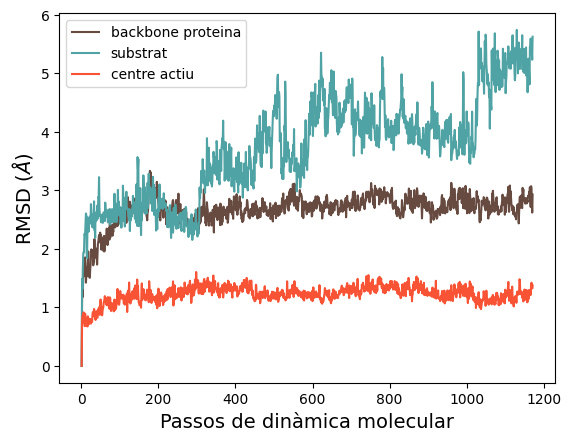

In [2]:
# Ejecutad primero esta celda para obtener el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/rmsd_uoc.dat --no-check-certificate

--2025-11-17 18:46:15--  https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/rmsd_uoc.dat
Resolving gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)... 18.201.253.30
Connecting to gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)|18.201.253.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69810 (68K) [text/plain]
Saving to: ‘rmsd_uoc.dat’

rmsd_uoc.dat        100%[===================>]  68.17K   322KB/s    in 0.2s    

2025-11-17 18:46:16 (322 KB/s) - ‘rmsd_uoc.dat’ saved [69810/69810]



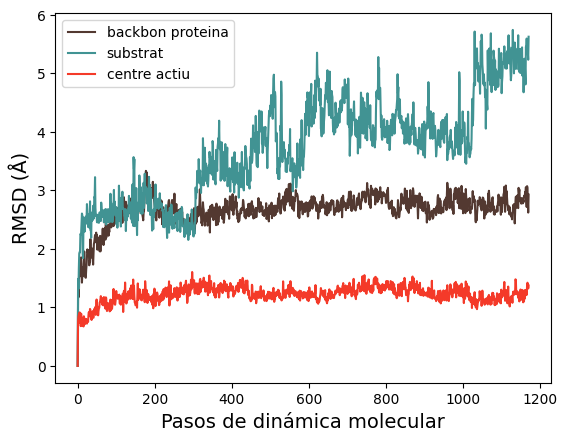

In [ ]:
# para poder visualizar el grafico en este notebook
%matplotlib inline

# importamos los módulos necesarios
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#RESPUESTA

# We create a path of the content file
rmsd_path = '/content/rmsd_uoc.dat'

# Transform the main array by the method genfromtxt
rmsd_array = np.genfromtxt(rmsd_path, usecols=(1,2,3))

# Set the colors in rgb using the conversion by hexa
colors = [(83/255, 57/255, 49/255),
            (65/255,147/255,147/255),
             (244/255, 58/255, 41/255)]

# Fix the parameters of prop_cycle with default colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Plot using the 3 nested arrays
plt.plot(rmsd_array[:,:3])

# Set the xlabel and ylabel + legend
plt.xlabel('Pasos de dinámica molecular', fontsize=14)
plt.ylabel('RMSD (Å)', fontsize=14)
plt.legend(['backbon proteina', 'substrat', 'centre actiu'])
plt.show()

### **Ejercicio 2**

Haced un gráfico en que se vea el rmsd del backbone de la proteína y el del centro activo en forma de histograma a lo largo de la trayectoria. El gráfico tiene que cumplir las siguientes condiciones:

* Tenéis que tener dos subplots por cada sistema.
* Los dos subplots tienen que compartir el mismo eje de las y
* Lo primero plot tiene que tener transparencia y tiene que ser de color verde rellenado
* El segundo plot solo tiene que tener la línea del histograma de color rojol

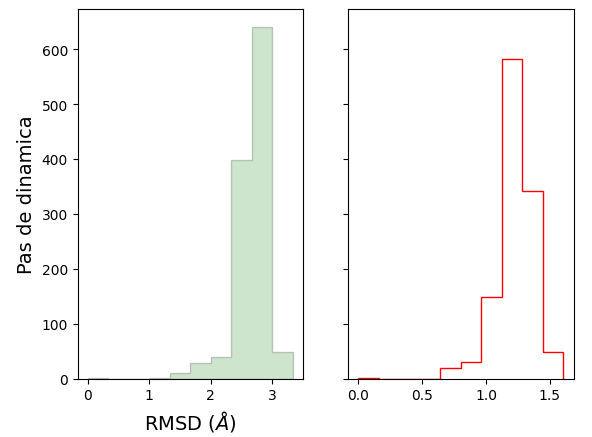


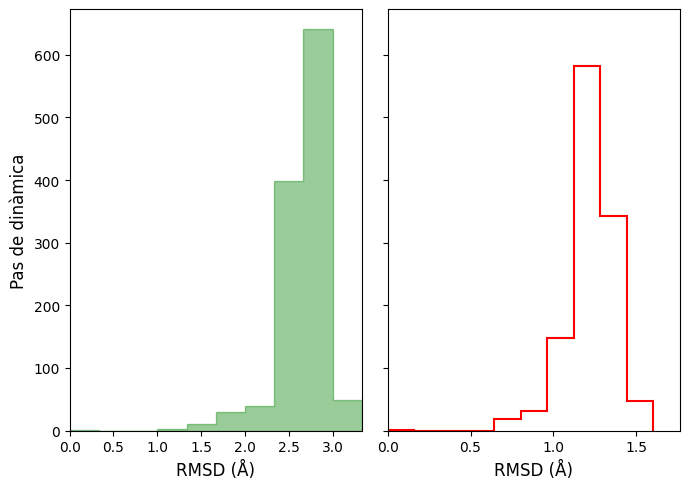

In [8]:
# para poder visualizar el grafico en este notebook
%matplotlib inline

#RESPUESTA
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

rmsd_path = '/content/rmsd_uoc.dat'
rmsd_array = np.genfromtxt(rmsd_path, usecols=(1, 2, 3))

"""
First step get backbone_rmsd and active_site_rmsd in two arrays
"""
backbone_rmsd = rmsd_array[:, 0]
active_site_rmsd = rmsd_array[:, 2]

"""
Second step, set the figure in two subplots 7x5
in the first subplot with histtype stepfilled configuration
in the second subplot with histtype step configuration
"""
# Create figure with two subplots sharing the y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5), sharey=True)

# First subplot: Backbone RMSD
ax1.hist(backbone_rmsd,
         density=False,
         histtype='stepfilled',
         color='green',
         alpha=0.4,
         edgecolor='green')

ax1.set_xlabel('RMSD (Å)', fontsize=12)
ax1.set_ylabel('Pas de dinàmica', fontsize=12)
ax1.set_xlim(0, max(backbone_rmsd))

# Second subplot: Active site RMSD
ax2.hist(active_site_rmsd,
         density=False,
         histtype='step',
         edgecolor='red',
         linewidth=1.5)

ax2.set_xlabel('RMSD (Å)', fontsize=12)
ax2.set_xlim(0, max(active_site_rmsd) * 1.1)

plt.tight_layout()
plt.show()

### **Ejercicio 3**



Existen una gran variedad de base de datos para todos los tipos de sistemas biológicos en que estemos interesados. Una de ellas es la base de datos llamada **CAZy** (http://www.cazy.org/), en que podemos encontrar descritas todas las familias de módulos catalíticos y de unión de carbohidratos relacionados estructuralmente (o dominios funcionales) de enzimas que degradan, modifican o crean enlaces glicosídicos, denominados **CAZymes**.

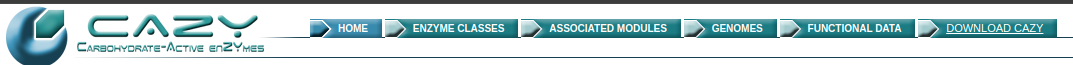

Aparte de consultar directamente la proteína en la que estemos interesados, podemos analizar este conjunto de datos descargándolas desde la página web. En este fichero podemos encontrar varías columnas con información diversa.

* **Primera columna**: Nombre de la clase de CAZyme, seguido con número de la familia a la cual pertenece
* **Segunda columna**: tipo de organismo donde se ha encontrado (Eukariota, bacteria...)
* **Tercera columna**: Organizme exacto donde se ha encontrado
* **Siguientes columnas**: Número de clasificación y en qué bases de datos se pueden encontrar.

Descargaréis un archivo denominado **cazy_fecha_*Aspergillus.txt* en que por motivos de medida, se ha dejado solo la información por los organismos Aspergillus.

In [ ]:
# Ejecutad primero esta celda pàra descargar el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/cazy_data_Aspergillus.txt --no-check-certificate

--2025-11-16 20:15:44--  https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/cazy_data_Aspergillus.txt
Resolving gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)... 18.201.253.30
Connecting to gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)|18.201.253.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2879244 (2.7M) [text/plain]
Saving to: ‘cazy_data_Aspergillus.txt’

cazy_data_Aspergill 100%[===================>]   2.75M  1.73MB/s    in 1.6s    

2025-11-16 20:15:47 (1.73 MB/s) - ‘cazy_data_Aspergillus.txt’ saved [2879244/2879244]



En este ejercicio tendremos que crear dos funciones en que las suyas características tienen que ser las siguientes:
* **es_digit()**: Creáis una función en que la variable de entrada se puede corresponder a un texto en que hay letras y números y tiene que devolver solo las letras en una sola variable en formato de string.
* **clasifica_classes_CAZymes()**: Creáis una función en que la variable de entrada sea un fichero de texto descargado de la base de datos CAZy y que clasifique en un diccionario, las clases de CAZymes que hay en aquel fichero y sus valores se corresponden a la cantidad existente por cada clase.

Finalmente, feudo un gráfico de diagrama de sectores (o pie chart en ángulos) en que se vean los porcentajes para cada clase, tal y como se ve en la siguiente figura.


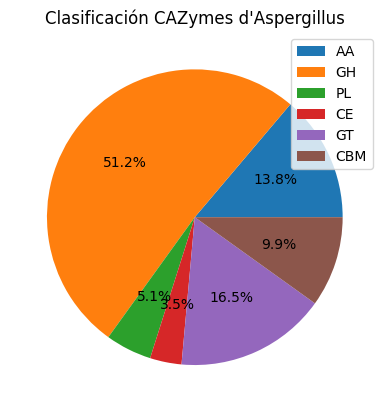

In [ ]:
# para poder visualizar el gráàfico en este notebook
%matplotlib inline

# importamos los módulos necessarios
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def es_digit(data):
    # Función que encuentra si un valor de un string es un digito o no, y solamente develve
    # los valores correspondientes a las letras
    #RESPUESTA
    resultado = ""
    for caracter in data:
        if not caracter.isdigit():
            resultado += caracter
    return resultado

def clasifica_classes_CAZymes(data):
  # Función en que creamos un diccionario en que las keys sueño el tipo de clases
  # que pueden llegar a existir por los CAZymes y los valores se corresponde a la
  # cantidad existente de estas clases.
  CAZymes = {}
  with open(data, "r") as infile:
    for line in infile:
      #respuesta
        # Dividimos la línea por tabulaciones
        campos = line.strip().split("\t")
        if campos:
            # El primer campo contiene la clase CAZyme (ej: AA5_2)
            clase_completa = campos[0]
            # Extraemos solo las letras (sin números y las dos primeras)
            clase = es_digit(clase_completa)[:2]

            # Contamos las ocurrencias de cada clase
            if clase in CAZymes:
                CAZymes[clase] += 1
            else:
                CAZymes[clase] = 1

    return CAZymes

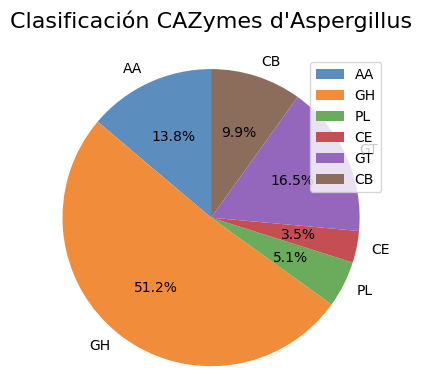

In [ ]:
"""
Recogemos los datos y extraeremos el contenido
"""
archivo = "/content/cazy_data_Aspergillus.txt"
clases = clasifica_classes_CAZymes(archivo)

"""
Creamos el gráfico de sectores
"""
labels = list(clases.keys())
sizes = list(clases.values())

# se definen los colores para cada clase
colores = ['#5B8DBE', '#F18D3A', '#6BAC5C', '#C44E52', '#9467BD', '#8C6D5B']

"""
Creamos la figura 5x5
Mostramos el gráfico circular
"""

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Clasificación CAZymes d\'Aspergillus', fontsize=16, pad=20)
plt.axis('equal')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

###**Ejercicios entregables**

**IMPORTANTE:** Recordad que es necesaria la línea

```python
%matplotlib inline
```
al principio de cada celdilla de código para que podáis visualizar los gráficos en este notebook.

### Ejercicio 1 **<font color="green" size="+2">MU</font>**

Representad en un único gráfico los valores de `RMSD` que obtenemos del mismo sistema durante dos réplicas (guardadas en las variables **rmsd_1** y **rmsd_2**) de dinámica molecular:

In [ ]:
# La representación debe dar una imagen como la siguiente

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

rmsd_1 = [0.0, 0.8179, 0.8722, 0.8167, 0.9986, 1.0228, 1.0871, 1.0272, 1.106, 1.214, 1.0416, 1.0352, 1.0699, 1.2043, 1.2302, 1.2311, 1.2343, 1.3265, 1.4224, 1.5417, 1.5107, 1.3624, 1.1884, 1.2587, 1.3398, 1.3975, 1.428, 1.4124, 1.5001, 1.5159, 1.4257, 1.4895, 1.4401, 1.4194, 1.4773, 1.331, 1.4052, 1.4228, 1.3882, 1.5344, 1.7261, 1.5357, 1.4964, 1.3815, 1.4766, 1.4516, 1.508, 1.4655, 1.5135, 1.3558]
rmsd_2 = [0.0, 0.8825, 0.9304, 0.9855, 1.1564, 0.8904, 0.8377, 1.1146, 1.0925, 1.0459, 1.1511, 1.1803, 1.1723, 1.0849, 1.2163, 1.2699, 1.3853, 1.3331, 1.4182, 1.3679, 1.3395, 1.3832, 1.3882, 1.2002, 1.4512, 1.3753, 1.4428, 1.4732, 1.4808, 1.5204, 1.4225, 1.4215, 1.4785, 1.4612, 1.4872, 1.4092, 1.411, 1.5148, 1.4719, 1.3599, 1.3812, 1.293, 1.3543, 1.3675, 1.3784, 1.4436, 1.6283, 1.6973, 1.61, 1.7059]

# Respuesta

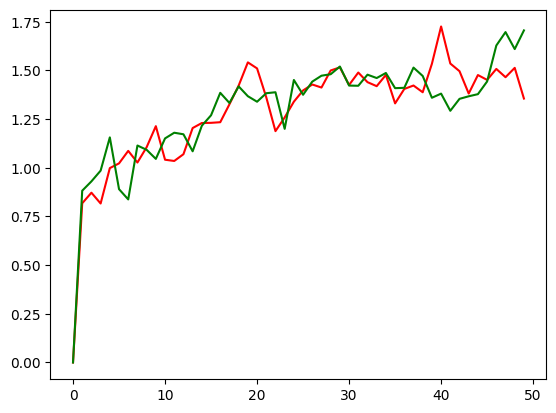

In [ ]:
# We plot directy using two main colors
plt.plot(rmsd_1, color='red')
plt.plot(rmsd_2, color='green')
plt.show()

### Ejercicio 2 **<font color="blue" size="+2">EG</font>**

Representa en un gráfico 3D la función `f(x,y) = 4*cos(x) + 3*sin(y)` en el intervalo `[-2(pi/2), 2(pi/2)]` (en radianes) con un step de `0.05`

Podéis consultar ejemplos de graficos 3D aquí: https://matplotlib.org/stable/plot_types/index.html

In [ ]:
# La representación debe dar una imagen como la siguiente

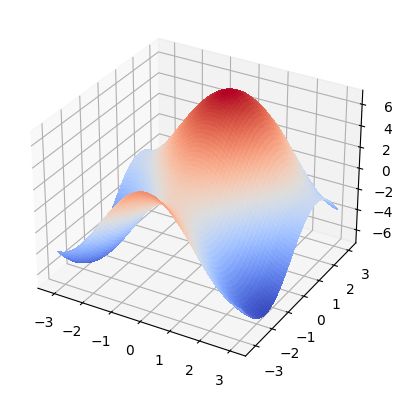

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Respuesta

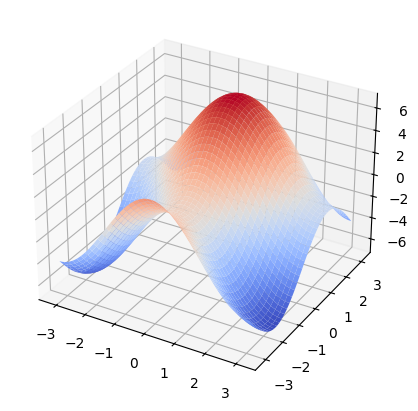

In [ ]:
"""
First step is define the range and step
by pi, xmin and ymin; xmax and ymax
"""
pi = np.pi
xmin, xmax = -pi, pi
ymin, ymax = -pi, pi
step = 0.05

"""
Then, we create two arrays fox x and y by np.arange
"""

x = np.arange(xmin, xmax + step, step)
y = np.arange(ymin, ymax + step, step)

"""
To achieve the same figure above, we should use
numpy meshgrid with x and y arrays
"""
# Crear la malla (grid) de coordenadas para X e Y
X, Y = np.meshgrid(x, y)

"""
Set the function as the description:
f(x,y) = 4*cos(x) + 3*sin(y)
"""
Z = 4 * np.cos(X) + 3 * np.sin(Y)

"""
Configure and show the 3D graph
adding the subplot
"""
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

"""
Finally, for the surface we set the map color coolwarm and finally
we achieve the same azimuth and elevation
"""
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')
ax.view_init(elev=30., azim=-60)
plt.show()

### Ejercicio 3 **<font color="blue" size="+2">EG</font>**
Representa la función que quieras de la forma que consideres. Sé creativo a la hora de escoger la función a representar y el intervalo de valores.

Podéis consultar https://matplotlib.org/stable/plot_types/index.html para inspiraros.

<>:8: SyntaxWarning: invalid escape sequence '\('
<>:8: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-4246418601.py:8: SyntaxWarning: invalid escape sequence '\('
  The Mandelbrot function is the recursive equation \(Z_{n+1}=Z_{n}^{2}+C\),


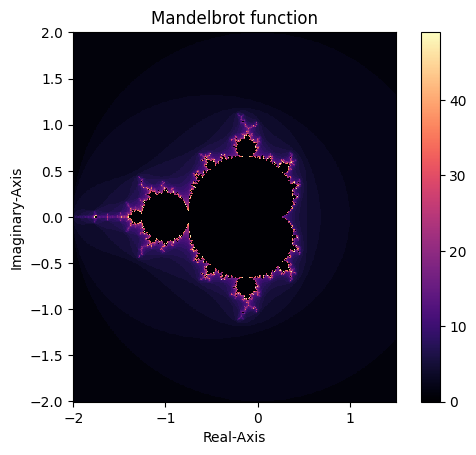

In [ ]:
%matplotlib inline

"""
We create the Mandelbrot function for matplotlib
using the following function by the Wikipedia's reference here:
https://en.wikipedia.org/wiki/Mandelbrot_set

The Mandelbrot function is the recursive equation \(Z_{n+1}=Z_{n}^{2}+C\),
which is used to generate the famous Mandelbrot set by iterating it for each
complex number \(C\). The set includes all complex numbers \(C\) for which the
sequence generated by this function, starting with \(Z_{0}=0\), does not tend
to infinity. Points in the set are often colored black, while points outside
the set are colored based on how quickly they diverge

"""

# Respuesta
import pylab as plt
import numpy as np

"""
Setting parameters to apply at the main recursive function
- any positive floating point value (n)
- any positive integer value
- set to any matplotlib valid colormap
"""
xDomain, yDomain = np.linspace(-2,1.5,500), np.linspace(-2,2,500)
bound = 2
power = 2
max_iterations = 50
colormap = 'magma'

"""
Second step, we computing 2-d array to represent the mandelbrot-set
based of this reference: https://realpython.com/mandelbrot-set-python/
"""
iterationArray = []
for y in yDomain:
    row = []
    for x in xDomain:
        c = complex(x,y)
        z = 0
        for iterationNumber in range(max_iterations):
            if(abs(z) >= bound):
                row.append(iterationNumber)
                break
            else: z = z**power + c
        else:
            row.append(0)
    iterationArray.append(row)

"""
Finally, we plotting the data
"""
ax = plt.axes()
ax.set_aspect('equal')
graph = ax.pcolormesh(xDomain, yDomain, iterationArray, cmap = colormap)
plt.colorbar(graph)
plt.xlabel("Real-Axis")
plt.ylabel("Imaginary-Axis")
plt.title('Mandelbrot function')
plt.show()

### Ejercicio 4 **<font color="green" size="+2">MU</font>**

Dados los siguientes datos procedentes de una dinámica molecular de una proteína, representad en uno o varios gráficos los valores máximos, mínimos y medios de la distancia entre un átomo del sustrato y diferentes aminoácidos de la proteína. Representad también, el r.m.s.f correspondiente para cada aminoácido.

_El root mean square fluctuation (r.m.s.f.) es una medida numérica que mide la flexibilidad individual de diferentes partículas a lo largo de una trayectoria de dinámica molecular. Esta medida normalmente nos sirve para encontrar qué aminoácidos son los que más contribuyen en el movimiento de la proteína._

Las posiciones del vector **datos_dinamica** son las siguientes:

* Número aminoácido
* Valor máximo distancia entre sustrato y aminoácido (Å)
* Valor mínimo distancia entre sustrato y aminoácido (Å)
* Valor medio distancia entre sustrato y aminoácido (Å)
* Valor r.m.s.f. (Å)

In [ ]:
# La representación ha de retornar gráficos similares a los siguientes:

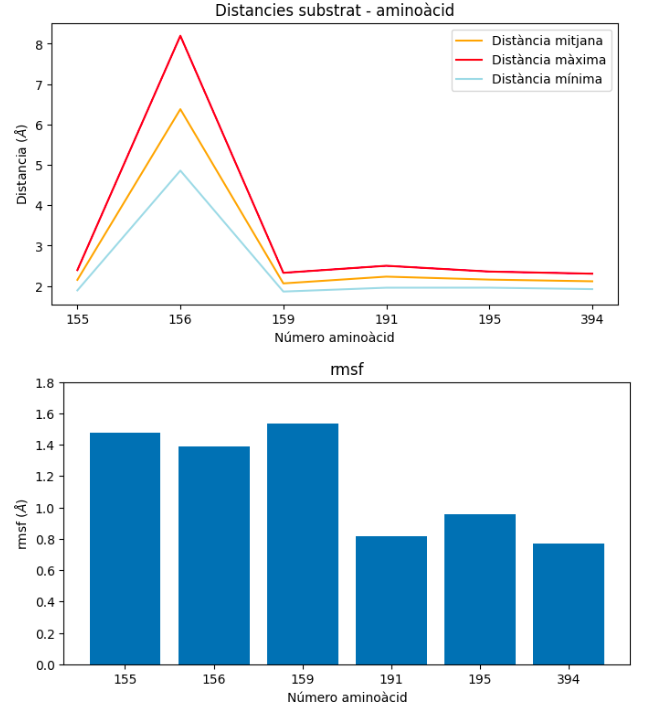

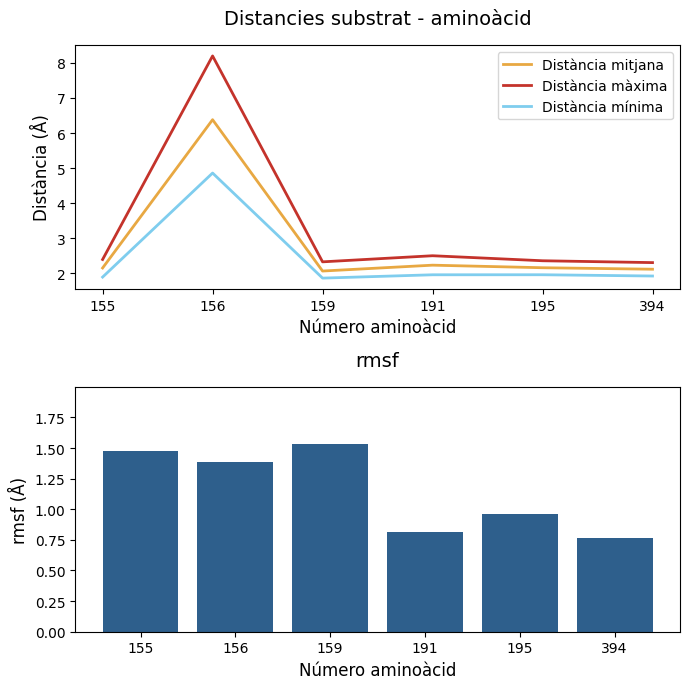

In [ ]:
from matplotlib import figure
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

datos_dinamica = [["155", 2.394, 1.892, 2.152, 1.478],
                  ["156", 8.198, 4.859, 6.380, 1.389],
                  ["159", 2.327, 1.863, 2.065, 1.535],
                  ["191", 2.501, 1.958, 2.232, 0.815],
                  ["195", 2.358, 1.959, 2.159, 0.959],
                  ["394", 2.305, 1.923, 2.117, 0.768]]

# Respuesta
"""
First of all, we need to extract the data per each
array represents:
- amino_acids; max_dist; min_dist; mean_dist; rmsf
"""
# Extract data
amino_acids = [d[0] for d in datos_dinamica]
max_dist = [d[1] for d in datos_dinamica]
min_dist = [d[2] for d in datos_dinamica]
mean_dist = [d[3] for d in datos_dinamica]
rmsf = [d[4] for d in datos_dinamica]

"""
Secondly, we create the figure with two subplots of 7,7 size
In the first plot, we show the aminoacids by distance
In the second plot, we show the aminoacids by rmsf frequency.
"""
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,7))

# First plot
ax1.plot(amino_acids, mean_dist, color='#E8A842', linewidth=2, label='Distància mitjana')
ax1.plot(amino_acids, max_dist, color='#C4332B', linewidth=2, label='Distància màxima')
ax1.plot(amino_acids, min_dist, color='#7FCDEE', linewidth=2, label='Distància mínima')

ax1.set_xlabel('Número aminoàcid', fontsize=12)
ax1.set_ylabel('Distància (Å)', fontsize=12)
ax1.set_title('Distancies substrat - aminoàcid', fontsize=14, pad=15)
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(False)
ax1.set_xticks(amino_acids)
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)

# Second plot
ax2.bar(amino_acids, rmsf, color='#2E5F8C', edgecolor='none')

ax2.set_xlabel('Número aminoàcid', fontsize=12)
ax2.set_ylabel('rmsf (Å)', fontsize=12)
ax2.set_title('rmsf', fontsize=14, pad=15)
ax2.set_xticks(amino_acids)
ax2.set_ylim(0, max(rmsf) * 1.3)
ax2.grid(False)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)

plt.tight_layout()
plt.show()

**Autoria**

Autores/as que han participado colectivamente en esta obra:


*   Pau Andrio Balado
*   Brian Jiménez García
*   Melchor Sanchez Martinez
*   Alba Nin Hill
* Xavier Grau-Bové

**Fecha de creación**


*   Ultima modificación: Octubre 2025